In [ ]:
pip install pandas scikit-learn matplotlib seaborn wordcloud 


In [ ]:
pip install --upgrade pip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [103]:
df = pd.read_csv("C:/Users/thivahar/Downloads/flipkart_data.csv")  
print(df.head())
print(df.info())

                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB
None


In [104]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [106]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df["cleaned_review"] = df["review"].apply(clean_text)

In [114]:
print(df.columns)


Index(['review', 'rating', 'cleaned_review', 'sentiment'], dtype='object')


In [117]:
def label_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating <= 2:
        return 1  # Negative
    else:
        return None  # Neutral (optional)

df["sentiment"] = df["rating"].apply(label_sentiment)

# Remove neutral reviews if desired
df = df.dropna(subset=["sentiment"])
df["sentiment"] = df["sentiment"].astype(int)

In [118]:
y = df["sentiment"]

In [119]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["cleaned_review"])
y = df["sentiment"].apply(lambda x: 1 if x == "Positive" else 0)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

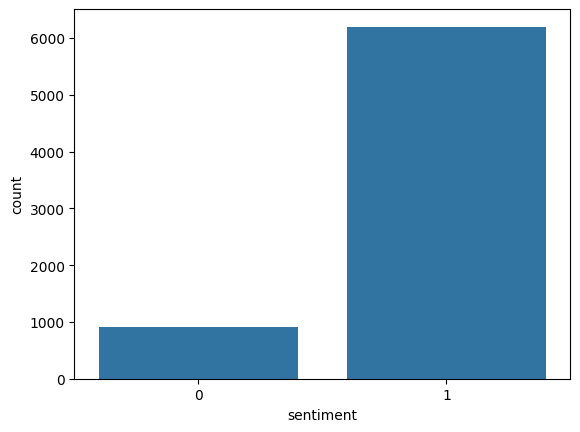

In [136]:
sns.countplot(x="sentiment", data=df)
plt.show()

In [112]:
pos_text = " ".join(df[df.sentiment == 1]["cleaned_review"])
neg_text = " ".join(df[df.sentiment == 2]["cleaned_review"])
WordCloud(width=800, height=400).generate(pos_text).to_image().show()
WordCloud(width=800, height=400).generate(neg_text).to_image().show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [121]:
wc = WordCloud(width=800, height=400).generate(pos_text)
wc.to_file("positive_wordcloud.png")

In [122]:
print("Training sentiment counts:")
print(pd.Series(y_train).value_counts())

Training sentiment counts:
sentiment
0    5687
Name: count, dtype: int64


In [123]:
print("Full sentiment counts:")
print(df["sentiment"].value_counts())

Full sentiment counts:
sentiment
1    7109
Name: count, dtype: int64


In [124]:
print(df["rating"].value_counts())

rating
5    4347
4    1851
1     631
2     280
Name: count, dtype: int64


In [125]:
def label_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating <= 2:
        return 0  # Negative
    else:
        return None  # Neutral

In [126]:
df["sentiment"] = df["rating"].apply(label_sentiment)
df = df.dropna(subset=["sentiment"])
df["sentiment"] = df["sentiment"].astype(int)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [128]:
# Vectorize
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["cleaned_review"])
y = df["sentiment"]  # Now includes both 0 and 1

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [130]:
print(pd.Series(y_train).value_counts())

sentiment
1    4958
0     729
Name: count, dtype: int64


In [131]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, preds)}")
    print(f"F1 Score: {classification_report(y_test, preds)}\n")


Model: Logistic Regression
Accuracy: 0.9170182841068917
F1 Score:               precision    recall  f1-score   support

           0       0.94      0.37      0.54       182
           1       0.92      1.00      0.95      1240

    accuracy                           0.92      1422
   macro avg       0.93      0.69      0.74      1422
weighted avg       0.92      0.92      0.90      1422


Model: Naive Bayes
Accuracy: 0.879746835443038
F1 Score:               precision    recall  f1-score   support

           0       0.92      0.07      0.12       182
           1       0.88      1.00      0.94      1240

    accuracy                           0.88      1422
   macro avg       0.90      0.53      0.53      1422
weighted avg       0.88      0.88      0.83      1422


Model: Random Forest
Accuracy: 0.9233473980309423
F1 Score:               precision    recall  f1-score   support

           0       0.88      0.47      0.61       182
           1       0.93      0.99      0.96      124

In [132]:
best_model = LogisticRegression()
best_model.fit(X_train, y_train)

LogisticRegression()

In [135]:
new_review = ["This product is amazing and works perfectly"]
new_vector = vectorizer.transform(new_review)
prediction = best_model.predict(new_vector)
print("Predicted Sentiment:", "Positive" if prediction[0] == 1 else "Negative")

Predicted Sentiment: Positive


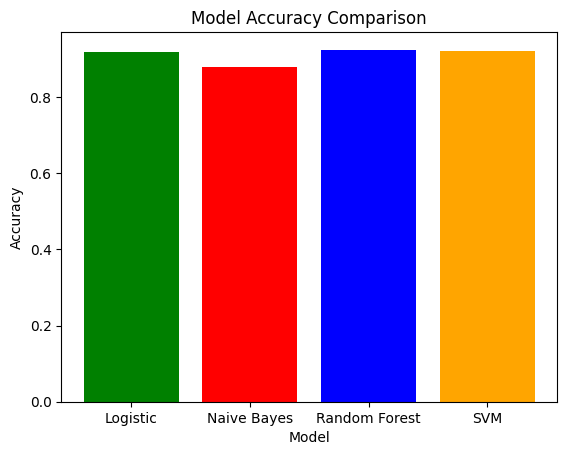

In [139]:
import matplotlib.pyplot as plt

models = ["Logistic", "Naive Bayes", "Random Forest", "SVM"]
accuracy = [0.917, 0.879, 0.924, 0.920]

colors = ["green", "red", "blue", "orange"]  # One color per model

plt.bar(models, accuracy, color=colors)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()